## 01. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 02. Create file path

In [4]:
# Turn Project Folder into Path
path = r'/Users/tanayawinder/Desktop/Case Study AirBnB'

In [5]:
# Check output
path

'/Users/tanayawinder/Desktop/Case Study AirBnB'

## 03. Import merged dataset

In [7]:
# Import cleaned listing csv file
listings = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','listings_cleaned_map.pkl'))

In [8]:
# Import cleaned listing csv file
analysis_df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','analysis_df.pkl'))

## 04. Data cleaning and checks

In [10]:
listings.columns

Index(['id', 'host_id', 'reviews_in_last_year', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'superhost', 'host_listings_count', 'neighborhood', 'borough',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'min_min_nights_allowed', 'max_min_nights_allowed',
       'min_max_nights_allowed', 'max_max_nights_allowed',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       

In [11]:
# Create a new DataFrame with the selected columns
analysis_df = listings[['id','accommodates', 'bedrooms', 'bathrooms', 'review_scores_rating', 'price']]

In [12]:
analysis_df.shape

(832827, 6)

In [13]:
listings.shape

(832827, 51)

### Check for missing values

In [15]:
# Check for missing values

listings.isnull().sum()

id                                               0
host_id                                          0
reviews_in_last_year                             0
host_since                                       1
host_response_time                               0
host_response_rate                               0
host_acceptance_rate                             0
superhost                                        0
host_listings_count                              1
neighborhood                                     0
borough                                          0
latitude                                         0
longitude                                        0
property_type                                    0
room_type                                        0
accommodates                                     0
bathrooms                                        2
bedrooms                                         0
amenities                                        0
price                          

In [16]:
listings_cleaned = listings.dropna()

In [17]:
# Check for missing values

listings_cleaned.isnull().sum()

id                                              0
host_id                                         0
reviews_in_last_year                            0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
superhost                                       0
host_listings_count                             0
neighborhood                                    0
borough                                         0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
amenities                                       0
price                                           0


### Check for duplicate rows

In [19]:
dups = listings_cleaned.duplicated().sum()

In [20]:
dups

0

### Check for extreme values

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_23124/2710875704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings_cleaned['price'], bins=25) # Shows extreme values
/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

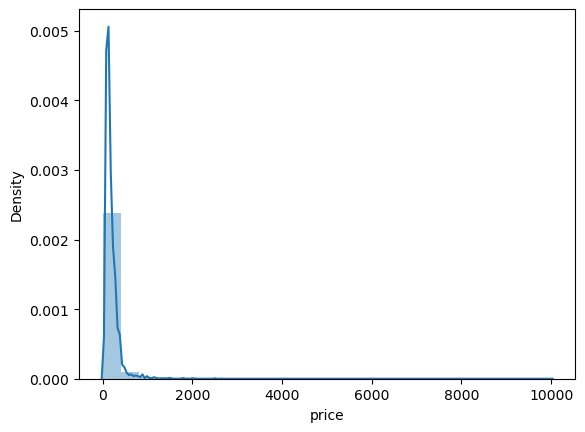

In [22]:
sns.distplot(listings_cleaned['price'], bins=25) # Shows extreme values

In [23]:
listings_cleaned['price'].max() # Check the max

10000.0

In [24]:
# Suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [25]:
listings_cleaned['price'].describe()

count   832810.00
mean       186.77
std        164.30
min         10.00
25%         99.00
50%        150.00
75%        222.00
max      10000.00
Name: price, dtype: float64

The listings for the NYC region can vary widely, with Manhattan in particular having luxury homes and apartments that rent for upwards of 10,000. Although it is an outlier, it is accurate regarding the price range to be found in NYC.

In [27]:
selected_columns = ['accommodates', 'bedrooms', 'bathrooms', 'review_scores_rating', 'price']
df_analysis = listings_cleaned[selected_columns]

In [28]:
listings_cleaned.shape

(832810, 51)

In [29]:
df_analysis.shape

(832810, 5)

In [30]:
df_analysis.head()

,accommodates,bedrooms,bathrooms,review_scores_rating,price
0,1,0.00,1.00,4.68,394.97
1,1,0.00,1.00,4.68,394.97
2,1,0.00,1.00,4.68,394.97
3,1,0.00,1.00,4.68,394.97
4,1,0.00,1.00,4.68,394.97


## 05. Data prep for regression analysis

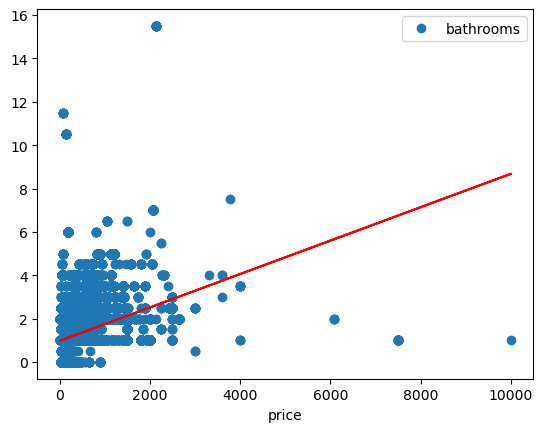

In [32]:
# Create the scatter plot for 'accommodates' vs 'price'
df_analysis.plot(x='price', y='bathrooms', style='o')

# Fit a line (e.g., linear regression line)
z = np.polyfit(df_analysis['price'], df_analysis['bathrooms'], 1)  # 1 for linear
p = np.poly1d(z)
plt.plot(df_analysis['price'], p(df_analysis['price']), color='red')

# Add titles and labels
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_analysis['price'].values.reshape(-1,1)
y = df_analysis['bathrooms'].values.reshape(-1,1)

In [34]:
X

array([[394.97],
       [394.97],
       [394.97],
       ...,
       [141.  ],
       [141.  ],
       [146.  ]])

In [35]:
y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 06. Regression analysis

In [38]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

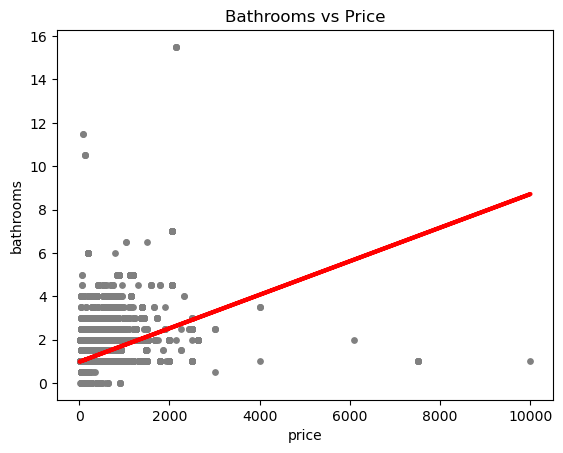

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Bathrooms vs Price')
plot_test.xlabel('price')
plot_test.ylabel('bathrooms')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0007744]]
Mean squared error:  0.13226425918829
R2 score:  0.1068104333101193


In [44]:
y_predicted

array([[1.06659348],
       [1.07356304],
       [1.08982534],
       ...,
       [1.01625779],
       [1.22457011],
       [1.06272151]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.00,1.07
1,1.00,1.07
2,1.00,1.09
3,1.00,1.11
4,1.00,1.08
5,1.00,1.09
6,1.00,1.08
7,1.00,1.05
8,1.00,1.20
9,1.00,1.03


In [46]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0007744]]
Mean squared error:  0.13218867193568398
R2 score:  0.10879452385174615


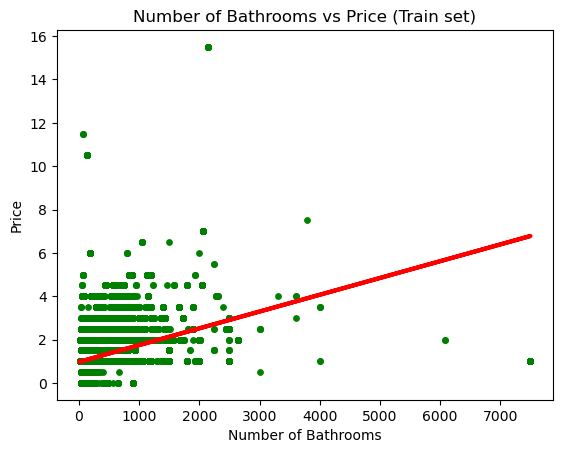

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Bathrooms vs Price (Train set)')
plot_test.xlabel('Number of Bathrooms')
plot_test.ylabel('Price')
plot_test.show()

In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data_xtrain = pd.DataFrame({'Actual': X_train.flatten(), 'Predicted': X_train.flatten()})
data.head(30)

,Actual,Predicted
0,1.00,1.07
1,1.00,1.07
2,1.00,1.09
3,1.00,1.11
4,1.00,1.08
5,1.00,1.09
6,1.00,1.08
7,1.00,1.05
8,1.00,1.20
9,1.00,1.03


Room for improvement if max outlier is removed. Remove outlier and discuss accuracy of results (use submitted examples).

After analyzing the data, the slope (0.0007744) suggests a very weak positive relationship between the selected variables. MSE (0.132) shows that the points are still scattered far from the regression line. The R² score (0.11) indicates a poor fit, meaning the model explains very little of the variance in the data. Thus, this model is not suitable for accurate predictions. Room for improvement if max outlier is removed. 

## 07. Remove outlier and retry model

In [54]:
df_analysis.describe()

,accommodates,bedrooms,bathrooms,review_scores_rating,price
count,832810.00,832810.00,832810.00,832810.00,832810.00
mean,2.97,1.29,1.11,4.78,186.77
std,1.92,0.81,0.39,0.19,164.30
min,1.00,0.00,0.00,0.00,10.00
25%,2.00,1.00,1.00,4.69,99.00
50%,2.00,1.00,1.00,4.82,150.00
75%,4.00,2.00,1.00,4.91,222.00
max,16.00,15.00,15.50,5.00,10000.00


In [55]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [56]:
listings_cleaned.describe()

,reviews_in_last_year,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,min_min_nights_allowed,max_min_nights_allowed,min_max_nights_allowed,max_max_nights_allowed,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date
count,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810.00,832810
mean,20.20,7.06,93.32,88.29,7.53,40.72,-73.94,2.97,1.11,1.29,186.77,23.23,533.32,22.94,24.00,730.48,2393692.49,23.43,1959697.44,10.39,25.82,42.27,187.39,158.14,20.20,4.78,4.83,4.75,4.88,4.87,4.75,4.73,5.30,2.70,2.49,0.03,2.57,2020-11-24 03:36:40.719971584
min,0.00,1.00,0.00,0.00,1.00,40.50,-74.25,1.00,0.00,0.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.01,2009-05-25 00:00:00
25%,2.00,1.00,93.32,88.00,1.00,40.68,-73.98,2.00,1.00,1.00,99.00,3.00,60.00,3.00,4.00,90.00,120.00,3.30,100.00,0.00,3.00,10.00,77.00,50.00,2.00,4.69,4.77,4.66,4.84,4.83,4.65,4.65,1.00,0.00,0.00,0.00,0.99,2018-12-03 00:00:00
50%,10.00,1.00,100.00,96.00,2.00,40.71,-73.95,2.00,1.00,1.00,150.00,30.00,365.00,30.00,30.00,1125.00,1125.00,30.00,1125.00,4.00,22.00,38.00,180.00,115.00,10.00,4.82,4.87,4.81,4.92,4.92,4.79,4.77,1.00,1.00,0.00,0.00,1.91,2021-10-12 00:00:00
75%,22.00,7.06,100.00,100.00,3.00,40.76,-73.92,4.00,1.00,2.00,222.00,30.00,1125.00,30.00,30.00,1125.00,1125.00,30.00,1125.00,22.00,48.00,75.00,308.00,215.00,22.00,4.91,4.93,4.91,4.96,4.97,4.90,4.85,3.00,1.00,1.00,0.00,3.06,2023-03-12 00:00:00
max,1568.00,72.00,100.00,100.00,4641.00,40.91,-73.71,16.00,15.50,15.00,10000.00,1250.00,20000000.00,1250.00,1250.00,20000000.00,2147483647.00,1250.00,2137448681.90,30.00,60.00,90.00,365.00,1915.00,1568.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,842.00,842.00,691.00,13.00,103.53,2024-07-05 00:00:00
std,55.11,13.96,17.60,19.59,77.30,0.06,0.06,1.92,0.39,0.81,164.30,22.25,21920.62,21.88,28.60,21920.63,71645499.46,23.50,62103172.57,11.61,22.26,32.93,125.11,163.90,55.11,0.19,0.17,0.23,0.14,0.16,0.20,0.19,21.11,15.72,12.89,0.25,4.09,NaN


In [57]:
# Assuming 'listings' is your DataFrame
listings_cleaned = listings_cleaned[listings_cleaned['price'] <= 9000]

In [58]:
# Assuming 'listings' is your DataFrame
df_analysis = df_analysis[df_analysis['price'] <= 9000]

In [59]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_analysis['price'].values.reshape(-1,1)
y = df_analysis['bathrooms'].values.reshape(-1,1)

In [60]:
X

array([[394.97],
       [394.97],
       [394.97],
       ...,
       [141.  ],
       [141.  ],
       [146.  ]])

In [61]:
y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [62]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Retry to see if there is any improvement

In [64]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [65]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

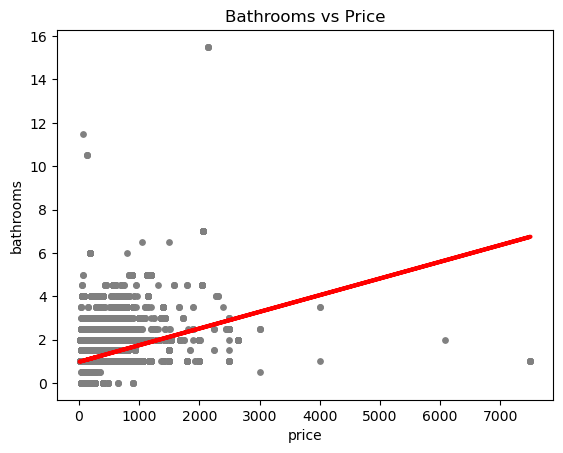

In [67]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Bathrooms vs Price')
plot_test.xlabel('price')
plot_test.ylabel('bathrooms')
plot_test.show()

In [68]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [69]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00076975]]
Mean squared error:  0.13182203173351037
R2 score:  0.11104382287562431


In [70]:
y_predicted

array([[1.1764964 ],
       [1.0181203 ],
       [1.03505481],
       ...,
       [1.12607777],
       [1.01273205],
       [1.08893732]])

In [71]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.00,1.18
1,1.00,1.02
2,1.00,1.04
3,1.00,1.06
4,1.00,1.08
5,1.00,1.23
6,1.00,1.15
7,1.00,1.03
8,1.00,1.04
9,1.00,1.08


In [72]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [73]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [74]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00076975]]
Mean squared error:  0.1322772503069301
R2 score:  0.10766252932882459


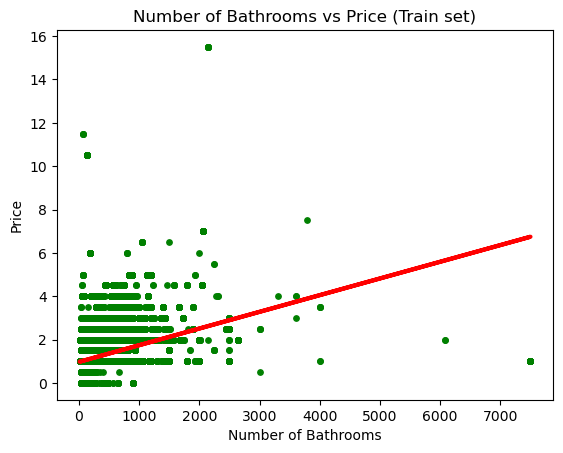

In [75]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Bathrooms vs Price (Train set)')
plot_test.xlabel('Number of Bathrooms')
plot_test.ylabel('Price')
plot_test.show()

In [76]:
# Create a dataframe comparing the actual and predicted values of y.

data_xtrain = pd.DataFrame({'Actual': X_train.flatten(), 'Predicted': X_train.flatten()})
data.head(30)

,Actual,Predicted
0,1.00,1.18
1,1.00,1.02
2,1.00,1.04
3,1.00,1.06
4,1.00,1.08
5,1.00,1.23
6,1.00,1.15
7,1.00,1.03
8,1.00,1.04
9,1.00,1.08


After removing the major outlier, the slope (0.00076975) still suggests a very weak positive relationship between the selected variables. MSE (0.1323) slightly increased, meaning the points are scattered slightly further from the regression line. The R² score (0.11) has slightly decreased, indicating a poor fit. Thus, this model shows no improvement and remains unsuitable for accurate predictions. Because of the wildly varying prices accross NYC, a new model is best run for specific neighborhoods or boroughs instead of the city as a whole. 

In [78]:
listings_cleaned.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'listings_cleaned_MachineLearning.pkl'))